In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from keras.layers import Flatten

In [21]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')


In [22]:
X_train = X_train.reshape(len(X_train),100,100,3)
X_test = X_test.reshape(len(X_test),100,100,3)

Y_train = Y_train.reshape(len(Y_train),1)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255
X_test = X_test/255

In [23]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


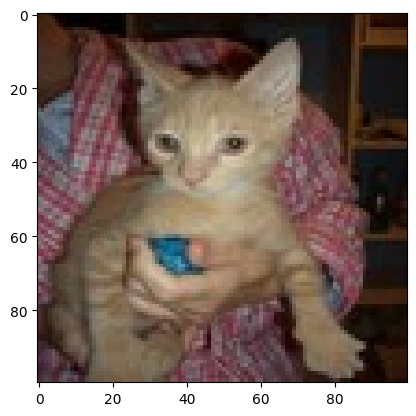

In [24]:
import random
index = random.randint(0, len(X_train))
plt.imshow(X_train[index])

In [25]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (100,100,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
])

c:\Users\delta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
Dropout(0.5)
model.add(Dense(1, activation='sigmoid'))

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience = 5, restore_best_weights=True)

In [28]:
model.fit(X_train, Y_train, epochs = 20, batch_size=32, validation_data=(X_test,Y_test))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 235ms/step - accuracy: 0.4976 - loss: 5432.7456 - val_accuracy: 0.5000 - val_loss: 0.7137
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - accuracy: 0.4874 - loss: 0.7005 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 245ms/step - accuracy: 0.4747 - loss: 0.6970 - val_accuracy: 0.5000 - val_loss: 0.6956
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.4950 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.5110 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - accuracy: 0.4997 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.7020
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.4853 - loss: 0.6996 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.4758 - loss: 0.6991 - val_a

In [29]:
model.evaluate(X_test, Y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7916 - loss: 0.6872


[0.6931993961334229, 0.5]

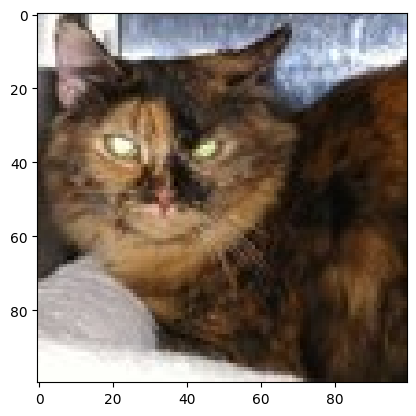

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Dog


In [30]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if(y_pred == 0):
    print("Dog")
else:
    print("Cat")